## Teraki Assignment (michelle tang, may 2019)

### Data Analysis with python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Read files into 2D array

In [4]:
with open('../output/dist_A.txt') as file:
    array_A = np.array([[float(digit) for digit in line.split()] for line in file])

In [5]:
array_A

array([[ 1.10030e+01,  8.37800e+00,  2.50000e-01, ...,  8.37800e+00,
         2.50000e-01,  0.00000e+00],
       [ 1.09380e+01,  8.38300e+00,  2.50000e-01, ...,  8.37800e+00,
         2.50000e-01,  7.07043e-03],
       [ 1.08720e+01,  8.38700e+00,  2.50000e-01, ...,  8.37800e+00,
         2.50000e-01,  1.27278e-02],
       ...,
       [ 6.98100e+00,  9.42900e+00, -1.85300e+00, ...,  9.42800e+00,
        -1.86000e+00,  1.06769e-02],
       [ 6.98200e+00,  8.30900e+00, -1.80100e+00, ...,  8.30800e+00,
        -1.81000e+00,  1.27670e-02],
       [ 6.96700e+00,  8.34500e+00, -1.80400e+00, ...,  8.33800e+00,
        -1.81000e+00,  1.00497e-02]])

In [6]:
with open('../output/dist_B.txt') as file:
    array_B = np.array([[float(digit) for digit in line.split()] for line in file])

In [7]:
array_B


array([[ 1.10030000e+01,  8.37800030e+00,  2.50000000e-01, ...,
         8.37699990e+00,  2.50000000e-01,  1.41449643e-03],
       [ 1.09380000e+01,  8.38300040e+00,  2.50000000e-01, ...,
         8.38300040e+00,  2.50000000e-01,  1.00000000e-03],
       [ 1.08720000e+01,  8.38700010e+00,  2.50000000e-01, ...,
         8.38600060e+00,  2.50000000e-01,  1.41386005e-03],
       ...,
       [ 6.98099990e+00,  9.42899990e+00, -1.85300000e+00, ...,
         9.42800050e+00, -1.85400000e+00,  1.73135806e-03],
       [ 6.98199990e+00,  8.30900000e+00, -1.80100000e+00, ...,
         8.30800060e+00, -1.80100000e+00,  1.41343575e-03],
       [ 6.96700000e+00,  8.34500030e+00, -1.80400000e+00, ...,
         8.34500030e+00, -1.80499990e+00,  1.41407214e-03]])

In [8]:
with open('../output/dist_C.txt') as file:
    array_C = np.array([[float(digit) for digit in line.split()] for line in file])

#### Plot histogram of the distances

In [9]:
dist_A = array_A[:,6]
dist_B = array_B[:,6]
dist_C = array_C[:,6]

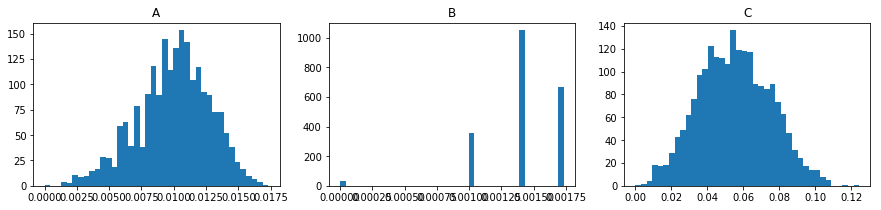

In [10]:
plt.figure(figsize=(15,3))

plt.subplot(1, 3, 1)
plt.hist(dist_A,bins=40)
plt.title('A')

plt.subplot(1, 3, 2)
plt.hist(dist_B,bins=40)
plt.title('B')

plt.subplot(1, 3, 3)
plt.hist(dist_C,bins=40)
plt.title('C')

plt.show()

Even if I make the bin for B very very small (bin number = 100), I still see 3 major peak and 1 small peak. See project report for further analysis.

Text(0.5,1,'B')

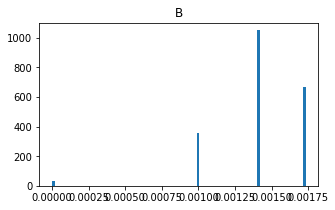

In [11]:
plt.figure(figsize=(5,3))

plt.hist(dist_B,bins=100)
plt.title('B')

#### Calculate the mean and standard deviation

In [12]:
print("For decompression A, distance is " + str(np.mean(dist_A)) + " ± " + str(np.std(dist_A)))

For decompression A, distance is 0.009990256984352774 ± 0.002788212352339345


In [13]:
print("For decompression B, distance is " + str(np.mean(dist_B)) + " ± " + str(np.std(dist_B)))

For decompression B, distance is 0.0014206542057088665 ± 0.00030695957260274125


In [14]:
print("For decompression C, distance is " + str(np.mean(dist_C)) + " ± " + str(np.std(dist_C)))

For decompression C, distance is 0.055161861569464204 ± 0.019975700781285667


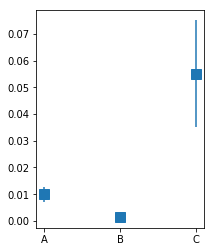

In [28]:
plt.figure(figsize=(3,4))

x = np.array(["A", "B", "C"])
y = np.array([np.mean(dist_A), np.mean(dist_B), np.mean(dist_C)])
e = np.array([np.std(dist_A), np.std(dist_B), np.std(dist_C)])


plt.errorbar(x, y, e, linestyle='None', marker='s', markersize=10)

plt.show()

#### Check duplicates in the pairing

As mentioned in the project report, the C++ algorithm for pairing the points may leads to  the scenario where several uncompressed points pair up with one decompressed points.  This function checks if that happens or not.

In [22]:
def check_duplicate(dist_array):
    """Because the way I generate ouput file in c++, there may be duplicated points for decompressed data points(column3,4,5 of the output array).
    Check if any two row has the same decompressed data points
    """
    
    duplication = False
    for i in range(len(dist_array)):
        #print("i is:" +str(i) )
        #print(duplication)
        for j in range(i+1, len(dist_array)):
            if ((dist_array[i][3]==dist_array[j][3]) & (dist_array[i][4]==dist_array[j][4]) & (dist_array[i][5]==dist_array[j][5])):
                #print("j is:" +str(j) )
                duplication = True
                
    if duplication == True:
        print("There are duplications")
    else:
        print("There's no duplicated points'")
    

In [23]:
check_duplicate(array_A)

There's no duplicated points'


In [24]:
check_duplicate(array_B)

There's no duplicated points'


In [25]:
check_duplicate(array_C)

There are duplications


Decompressed data A and B do not have duplicated points from the pairing function in C++, but data set C has a lot of duplicates.  See further analysis in project report.